RESEARCH QUESTION 1 <br>

Is there a correlation between certain attributes and song popularity?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from ast import literal_eval

main_song_df = pd.read_csv("data/spotify_songs.csv")
main_song_df = main_song_df.drop_duplicates(subset="track_id")
main_song_df = main_song_df.dropna()

stream_df = pd.read_csv("data/stream_data.csv", sep="#")
stream_df = stream_df.drop(columns=["Date", "Position"])

stream_df = stream_df.dropna()

stream_df["Genre"] = stream_df["Genre"].apply(literal_eval)

# Group by 'Track Name' and 'Artist', sum the 'Streams', and aggregate genres
stream_grouped = (
    stream_df.groupby(["Track Name", "Artist"])
    .agg(
        {
            "Streams": "sum",
            "Genre": lambda x: list(
                set([genre for sublist in x for genre in sublist])
            ),
        }
    )
    .reset_index()
)

# print(stream_grouped)
stream_grouped.columns

Index(['Track Name', 'Artist', 'Streams', 'Genre'], dtype='object')

In [4]:
sorted_stream_group = stream_grouped.sort_values("Streams", ascending=False)

sorted_stream_group

,Track Name,Artist,Streams,Genre
4173,Shape of You,Ed Sheeran,2736191812,"[pop, uk pop]"
643,Blinding Lights,The Weeknd,2198561599,"[canadian pop, canadian contemporary r&b, pop]"
1105,Dance Monkey,Tones And I,2157954402,"[australian pop, pop]"
4358,Someone You Loved,Lewis Capaldi,1858199748,"[pop, uk pop]"
4511,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,1851044231,"[rap, melodic rap, dfw rap]"
...,...,...,...,...
4427,Stay (feat. Maty Noyes),Kygo,347597,"[edm, tropical house, pop dance, pop]"
3734,Purple Lamborghini (with Rick Ross),Skrillex,343807,"[edm, pop dance, complextro, brostep, electro]"
3552,Paper Planes,M.I.A.,341003,"[new rave, indietronica, escape room, dance pop]"
4490,Sugar,Maroon 5,335115,"[pop, pop rock]"


In [6]:
merged_df = main_song_df.merge(
    sorted_stream_group,
    left_on=["track_name", "track_artist"],
    right_on=["Track Name", "Artist"],
)

merged_df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'Track Name', 'Artist', 'Streams', 'Genre'],
      dtype='object')

In [5]:
is_pop = merged_df["playlist_genre"] == "pop"

merged_df = merged_df[is_pop]

In [6]:
relevant_cols = [
    "danceability",
    "energy",
    "loudness",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "duration_ms",
    "Streams",
]

important_df = merged_df[relevant_cols]

danceability        0.160944
energy             -0.127474
loudness            0.000708
speechiness         0.054050
acousticness        0.109384
instrumentalness   -0.018900
liveness           -0.078453
valence             0.057598
tempo              -0.037371
duration_ms        -0.090750
Name: Streams, dtype: float64


/var/folders/8y/z54f8_6n19qfj1pkdc_jwtjw0000gq/T/ipykernel_23782/159858699.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popularity_corr.index, y=popularity_corr.values, palette=palette)


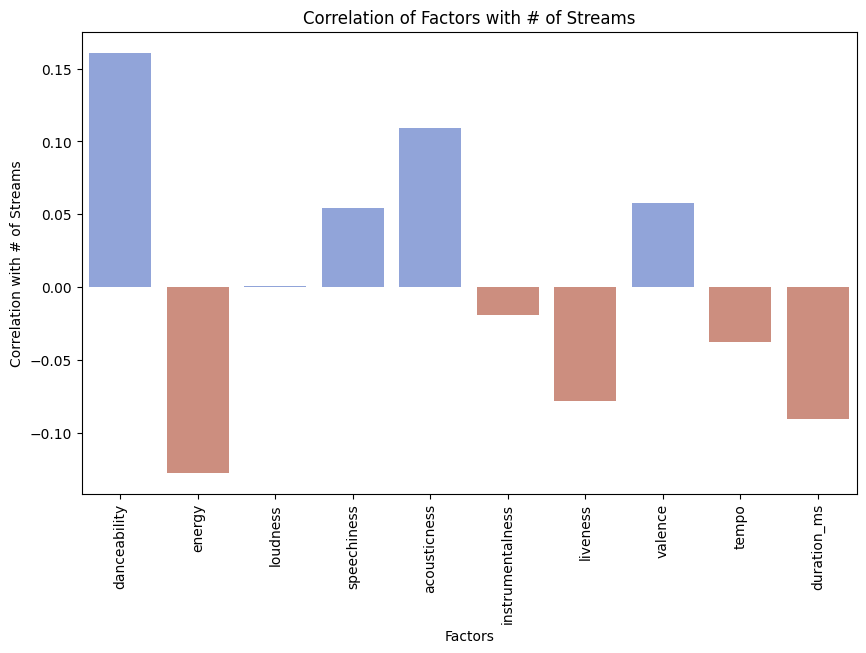

In [7]:
corr_matrix = important_df.corr()

popularity_corr = corr_matrix["Streams"].drop("Streams")

print(popularity_corr)

plt.figure(figsize=(10, 6))
palette = [
    "#D98672" if value < 0 else "#859FE5" for value in popularity_corr.values
]
sns.barplot(x=popularity_corr.index, y=popularity_corr.values, palette=palette)
plt.xticks(rotation=90)
plt.xlabel("Factors")
plt.ylabel("Correlation with # of Streams")
plt.title("Correlation of Factors with # of Streams")
plt.show()